In [79]:
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
resolutions = [37, 64, 128, 256]
regions = ['c', 'a']
temp_res = '24H'
attributes = ["costs", "energy", "capacity", "supply_energy", "supply", "curtailment"]
lv = 'copt'

In [81]:
dict_attr = dict()
for region in regions:
    dict_attr[region] = dict()
    for attr in attributes:
        df_attr = pd.DataFrame()
        for resolution in resolutions:
            attr_res = pd.read_csv(f"results/summaries/elec_s_{resolution}_{region}_ec_l{lv}_Co2L-{temp_res}_all/{attr}.csv")
            attr_res["resolution"] = resolution
            df_attr = df_attr.append(attr_res)

        df_attr = df_attr.drop([0,1,2,3])

        if attr == "costs":
            df_attr.rename(columns = {'simpl':'tech_type','Unnamed: 1':'cost_type', 'Unnamed: 2':'technology','Unnamed: 3':attr}, inplace = True)
        elif (attr == "energy" or attr == "capacity"):
            df_attr.rename(columns = {'simpl':'tech_type','Unnamed: 1':'technology', 'Unnamed: 2': attr}, inplace = True)
        elif (attr == "supply_energy" or attr == "supply" ):
            df_attr.rename(columns = {'simpl':'carrier','Unnamed: 1':'technology_type', 'Unnamed: 2':'technology','Unnamed: 3':attr }, inplace = True)
        elif attr == "curtailment":
            df_attr.rename(columns = {'simpl':'technology','Unnamed: 1':attr}, inplace = True)

        df_attr[attr] = df_attr[attr].astype(float)

        dict_attr[region][attr] = df_attr.reset_index()
        
    

In [91]:
#Let's start with total cost
for regions_method in regions:
    df_attr = dict_attr[regions_method]["costs"]
    tot_c[regions_method] =  df_attr.groupby(["resolution"])["costs"].sum()


Text(0.5, 1.0, 'Cost comparison')

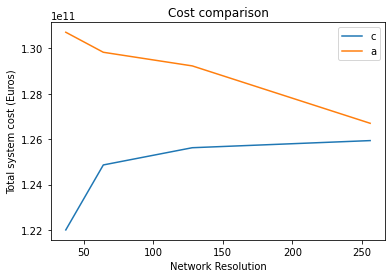

In [224]:
total_cost_fig = plt.subplot()
for region in regions[:]:
    total_cost_fig.plot(tot_c[region],label = region)
plt.legend()
plt.xlabel("Network Resolution")
plt.ylabel("Total system cost (Euros)")
plt.title("Cost comparison")

In [119]:
#And continue with some more specific costs 
for region_method in regions: 
    df_attr = dict_attr[region_method]["costs"]
    #Line costs
    lc[region_method] =  df_attr.groupby(["technology","resolution"])["costs"].sum()["lines"]

    solarc[region_method] =  df_attr.groupby(["technology","resolution"])["costs"].sum()["solar"]
    onwind_c[region_method] =  df_attr.groupby(["technology","resolution"])["costs"].sum()["onwind"]
    offwind_c[region_method] =  df_attr.groupby(["technology","resolution"])["costs"].sum()["offwind-ac"] \
                 +  df_attr.groupby(["technology","resolution"])["costs"].sum()["offwind-dc"]

    ren[region_method] = solarc[region_method] + onwind_c[region_method] + offwind_c[region_method]

    CCGT_c[region_method] = df_attr.groupby(["technology","resolution"])["costs"].sum()["CCGT"]
    OCGT_c[region_method] = df_attr.groupby(["technology","resolution"])["costs"].sum()["OCGT"]
    nuclear[region_method] = df_attr.groupby(["technology","resolution"])["costs"].sum()["nuclear"]

    conventional[region_method] = CCGT_c[region_method] + OCGT_c[region_method] + nuclear[region_method]

    hydroPHS[region_method] = df_attr.groupby(["technology","resolution"])["costs"].sum()["hydro+PHS"]
    ror[region_method] = df_attr.groupby(["technology","resolution"])["costs"].sum()["ror"]

In [127]:
pivot_dict = dict()
for region_method in regions: 
    df_attr = dict_attr[region_method]["costs"]
    pivot_dict[region_method] = df_attr.pivot_table(index = 'resolution', columns = 'technology',values= 'costs', aggfunc = 'sum')
    pivot_dict[region_method]["offwind"] = pivot_dict[region_method]["offwind-ac"] + pivot_dict[region_method]["offwind-dc"]
    pivot_dict[region_method]["H2"] = pivot_dict[region_method]["H2"] + pivot_dict[region_method]["H2 electrolysis"]+ pivot_dict[region_method]["H2 fuel cell"]
    pivot_dict[region_method]["Hydro"] = pivot_dict[region_method]["hydro+PHS"]

In [219]:
tech_selection = ["lines", "solar", "onwind"]#, "OCGT", "nuclear", "Hydro", "battery", "offwind",  "CCGT", "nuclear"]

[Text(0.5, 0, 'resolution'),
 (12500000000.0, 27500000000.0),
 Text(0.5, 1.0, 'Renewable-based')]

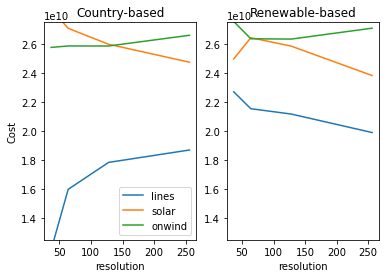

In [223]:
fig,axs = plt.subplots(1,2)
y_scale = [1.25e10, 2.75e10]
#y_scale = [0, 2.75e10]
axs[0].plot(pivot_dict['c'][tech_selection],label = tech_selection)
#axs[0] = pivot_dict['c'][tech_selection].plot()
axs[0].set(xlabel = "resolution",ylabel = "Cost",ylim = y_scale, title = "Country-based")
axs[0].legend()
axs[1].plot(pivot_dict['a'][tech_selection])
axs[1].set(xlabel = "resolution",ylim = y_scale, title = "Renewable-based")


In [181]:
axs[0]

<AxesSubplot:xlabel='resolution', ylabel='Cost'>

<AxesSubplot:xlabel='resolution'>

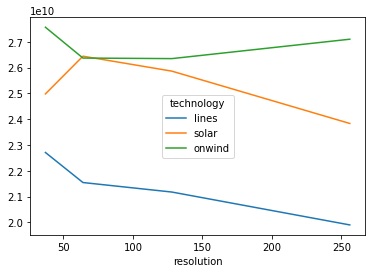

In [167]:
pivot_dict['a'][tech_selection].plot()

AttributeError: module 'matplotlib.pyplot' has no attribute 'area'

In [134]:
ax

resolution  technology
37          lines         2.270888e+10
            solar         2.497819e+10
            onwind        2.756200e+10
            offwind       8.158029e+03
            CCGT          6.676427e+06
            OCGT          5.273115e+05
            nuclear       1.856611e+10
            Hydro         2.476561e+10
            ror           9.349921e+09
            battery       1.874643e+03
64          lines         2.154378e+10
            solar         2.644042e+10
            onwind        2.636792e+10
            offwind       2.978478e+04
            CCGT          1.953695e+08
            OCGT          3.235135e+05
            nuclear       1.839567e+10
            Hydro         2.476550e+10
            ror           9.349893e+09
            battery       8.165766e+03
128         lines         2.117485e+10
            solar         2.586060e+10
            onwind        2.634642e+10
            offwind       1.948587e+04
            CCGT          9.425697e+08
  